In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = pd.read_csv('C:\\Users\\bethf\\Desktop\\Resources\\ride_data.csv')
ride_data_to_load = pd.read_csv('C:\\Users\\bethf\\Desktop\\Resources\\city_data.csv')

# Read the City and Ride Data
citydata = (city_data_to_load)
ridedata = (ride_data_to_load)

# Combine the data into a single dataset
pyberdata = pd.merge(citydata, ridedata, how="left", on=["city", "city"])

# Display the data table for preview
pyberdata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

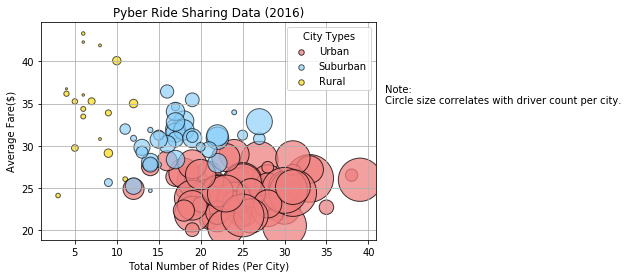

In [7]:
# Obtain the x and y coordinates for each of the three city types
urbanx = pyberdata.loc[pyberdata["type"]=="Urban"].groupby("city")["fare"].count()
urbany = pyberdata.loc[pyberdata["type"]=="Urban"].groupby(["city"])["fare"].mean()
urbans = pyberdata.loc[pyberdata["type"]=="Urban"].groupby(["city"])["driver_count"].sum()

suburbanx = pyberdata.loc[pyberdata["type"]=="Suburban"].groupby("city")["fare"].count()
suburbany = pyberdata.loc[pyberdata["type"]=="Suburban"].groupby(["city"])["fare"].mean()
suburbans = pyberdata.loc[pyberdata["type"]=="Suburban"].groupby(["city"])["driver_count"].sum()

ruralx = pyberdata.loc[pyberdata["type"]=="Rural"].groupby("city")["fare"].count()
ruraly = pyberdata.loc[pyberdata["type"]=="Rural"].groupby(["city"])["fare"].mean()
rurals = pyberdata.loc[pyberdata["type"]=="Rural"].groupby(["city"])["driver_count"].sum()

# Build the scatter plots for each city types
plt.scatter(urbanx, urbany, marker="o", color="lightcoral",alpha=.75,edgecolors ="k",s=urbans,label="Urban")
plt.scatter(suburbanx, suburbany, marker="o", color="lightskyblue",alpha=.65,edgecolors ="k",s=suburbans,label="Suburban")
plt.scatter(ruralx, ruraly, marker="o", color="gold",alpha=.65,edgecolors ="k",s=rurals,label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc=0,title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig('C:\\Users\\bethf\\Desktop\\Output\\ridesharing.png')

## Total Fares by City Type

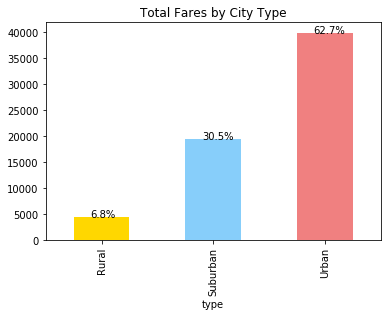

In [9]:
# Build Bar Chart
colors = ["gold","lightskyblue","lightcoral"]
ax = pyberdata.groupby("type")["fare"].sum().plot(kind="bar",title="Total Fares by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('C:\\Users\\bethf\\Desktop\\Output\\faresbytype.png')

## Total Rides by City Type

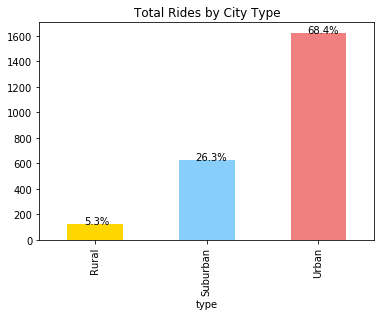

In [10]:
# Build Bar Chart
ax = pyberdata.groupby("type")["fare"].count().plot(kind="bar",title="Total Rides by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('C:\\Users\\bethf\\Desktop\\Output\\ridesbytype.png')

## Total Drivers by City Type

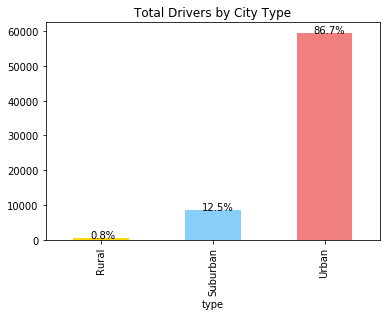

In [13]:
# Calculate Driver Percents
ax = pyberdata.groupby("type")["driver_count"].sum().plot(kind="bar",title="Total Drivers by City Type",color=colors)

#Add percentages to bars to show percentage of total
totals = [i.get_height() for i in ax.patches]
total = sum(totals)
  
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height(),str(round((i.get_height()/total)*100, 1))+'%')
    
# Save Figure
plt.savefig('C:\\Users\\bethf\\Desktop\\Output\\driversbytype.png')